In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import numpy.random as rnd
import seaborn as sns
sns.set()
%matplotlib inline

# Task 1

$$\text{Clustering coefficient} = \frac{\langle k \rangle}{n} = p $$
Generate $100$ Random Graphs with $n = 1000$ and $p = 0.002$ (for saving computational time) and plot the box-plot of your computations

Функция для генерации графа

In [3]:
def generate_graph(n, p):
    G=nx.Graph()
    G.add_nodes_from(range(0, n))
    for i in range(0, n):
        for j in range(i+1, n):
            if rnd.random() <= p:
                G.add_edge(i, j)
    return G

Функция для генерации множества графов

In [4]:
def generate_k_graph(k, n, p):
    gs = []
    for i in range(k):
        gs.append(generate_graph(n, p))
    return gs

Генерим графы с заданными условиями:

In [5]:
n = 1000
p = 0.002
gs = generate_k_graph(100, n, p)

Посчитаем для них коэффициенты кластеризации:

In [10]:
cluster_coefs = []
for G in gs:
    cluster_coefs.append(G.number_of_edges() / (n * (n-1) / 2))

Построим график:

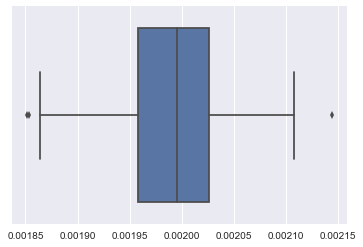

In [11]:
sns.boxplot(cluster_coefs)

Действительно, среднее значение находится примерно на значении $p=0.002$

# Task 2

In this task you are asked to calculate the average size of small components (small component = not a giant one) with regard to average degree of the network. To see the effect clearly, plot average size around $\langle k \rangle = 1$.

На самом деле задание было (как оказалось) о другом - надо перебирать $n\cdot p$ и для каждого значения генерить графы, для которых смотреть средний размер не самых больших компонент.
Для этой цели фиксируем $n$, перебираем $p$ от 0.0001 до 0.0015 (чтобы $n \cdot p$ получилось в районе 1), смотрим значения.

In [90]:
n = 1000
p = 0.0001
k = 50
values = []
steps = 15
iter_num = 0
for p2 in np.linspace(0.0001, 0.0015, steps):
    iter_num += 1
    print(iter_num, "ITERATION FROM", steps)
    cur_gs = generate_k_graph(k, n, p2)
    graphs_comp_lens = []
    for G in cur_gs:
        comp_lens = [len(x) for x in sorted(list(nx.connected_components(G)), key=len)[:-1]]
        graphs_comp_lens.append(np.mean(comp_lens))
    values.append(np.mean(graphs_comp_lens))

1 ITERATION FROM 15
2 ITERATION FROM 15
3 ITERATION FROM 15
4 ITERATION FROM 15
5 ITERATION FROM 15
6 ITERATION FROM 15
7 ITERATION FROM 15
8 ITERATION FROM 15
9 ITERATION FROM 15
10 ITERATION FROM 15
11 ITERATION FROM 15
12 ITERATION FROM 15
13 ITERATION FROM 15
14 ITERATION FROM 15
15 ITERATION FROM 15


Построим график

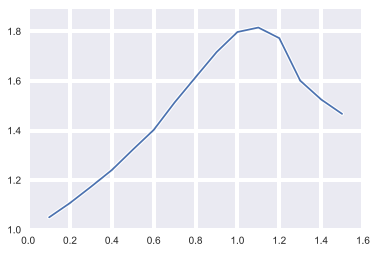

In [91]:
plt.plot(np.linspace(0.0001, 0.0015, steps)*n, values)

Заметим, что максимум достигается в районе единички. Почему это так? Скорее всего это связано с тем, что пока $n\cdot p <1$ с увеличением $n\cdot p$ самая большая компонента связности еще не "поглотила" достаточное количество вершин. Однако после критического значения она поглощает вершины, которые потенциально могли бы быть связаны друг с другом, образуя компоненты связности большие единицы.

# Task 3

Plot the average path length and transitivity coefficents with $n=1000$ and p=0.001 while increasing by 0.003

In [ ]:
n = 1000
p = 0.001
k = 10
shortest_path_values = []
transitivity_values = []
steps = int(0.999/0.003 + 1)
iter_num = 0
for p2 in np.linspace(0.001, 1, steps):
    iter_num += 1
    print(iter_num, "ITERATION FROM", steps)
    cur_gs = generate_k_graph(k, n, p2)
    graphs_shortest_path = []
    graphs_transitivity = []
    for G in cur_gs:
        G_comp = G.subgraph(max(nx.connected_component_subgraphs(G), key=len))
        graphs_shortest_path.append(nx.average_shortest_path_length(G_comp))
        graphs_transitivity.append(nx.transitivity(G_comp))
    new_shortest_path = np.mean(graphs_shortest_path)
    new_transitivity = np.mean(graphs_transitivity)
    if len(transitivity_values) > 3:
        if np.absolute(new_shortest_path - shortest_path_values[-1]) < 0.1 and np.absolute(new_transitivity - transitivity_values[-1] < 0.001):
            break
    shortest_path_values.append(new_shortest_path)
    transitivity_values.append(new_transitivity)

1 ITERATION FROM 334
2 ITERATION FROM 334
3 ITERATION FROM 334
4 ITERATION FROM 334
5 ITERATION FROM 334
6 ITERATION FROM 334
7 ITERATION FROM 334
8 ITERATION FROM 334
9 ITERATION FROM 334
10 ITERATION FROM 334
11 ITERATION FROM 334
12 ITERATION FROM 334
13 ITERATION FROM 334
14 ITERATION FROM 334
15 ITERATION FROM 334
16 ITERATION FROM 334
17 ITERATION FROM 334
18 ITERATION FROM 334
19 ITERATION FROM 334
20 ITERATION FROM 334
21 ITERATION FROM 334
22 ITERATION FROM 334
23 ITERATION FROM 334
24 ITERATION FROM 334
25 ITERATION FROM 334
26 ITERATION FROM 334
27 ITERATION FROM 334
28 ITERATION FROM 334
29 ITERATION FROM 334
30 ITERATION FROM 334
31 ITERATION FROM 334
32 ITERATION FROM 334
33 ITERATION FROM 334
34 ITERATION FROM 334
35 ITERATION FROM 334
36 ITERATION FROM 334
37 ITERATION FROM 334


In [ ]:
plt.plot(np.linspace(0.001, p2-0.003, len(shortest_path_values)), shortest_path_values)

In [ ]:
plt.plot(np.linspace(0.001, p2-0.003, len(transitivity_values)), transitivity_values)